In [1]:
import sqlalchemy
import pandas as pd
from components.charts import heatmap_chart

In [2]:
engine = sqlalchemy.create_engine('sqlite:///stock_etf.db')

In [3]:
data = pd.read_sql_query(
    "SELECT * FROM stockData", engine, parse_dates="Date")

In [21]:
portfolio_ratios = pd.DataFrame({
    'CSCO/AES': (data["CSCO"]/data["AES"]),
    'AFL/PPBI': (data["AFL"]/data["PPBI"]),
    'BRO/EXR': (data["BRO"]/data["EXR"]),
    'CDNS/BURL': (data["CDNS"]/data["BURL"]),
    'GNTX/AX': (data["GNTX"]/data["AX"]),
})

In [22]:
corr_check = portfolio_ratios.corr(method='spearman').round(2)

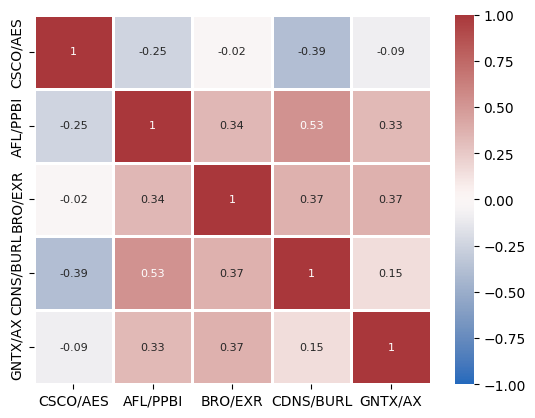

In [23]:
heatmap_chart(corr_check)

In [24]:
corr_check

,CSCO/AES,AFL/PPBI,BRO/EXR,CDNS/BURL,GNTX/AX
CSCO/AES,1.00,-0.25,-0.02,-0.39,-0.09
AFL/PPBI,-0.25,1.00,0.34,0.53,0.33
BRO/EXR,-0.02,0.34,1.00,0.37,0.37
CDNS/BURL,-0.39,0.53,0.37,1.00,0.15
GNTX/AX,-0.09,0.33,0.37,0.15,1.00
